# 🩺 Análisis Predictivo del Riesgo de Enfermedad Coronaria

### **1. Introducción**

Este proyecto tiene como objetivo principal predecir el riesgo de que un paciente desarrolle una enfermedad coronaria en un período de 10 años. Para ello, se utiliza un conjunto de datos del famoso estudio Framingham, que contiene información sobre factores de riesgo demográficos, de comportamiento y médicos.

El análisis se estructura en los siguientes pasos:
1.  **Exploración y preparacion de Datos (EDA):** Identificación y manejo de valores atípicos y desequilibrios de clase.
2.  **Análisis de Factores de Riesgo:** Exploración de la correlación entre las variables y la variable objetivo (`TenYearCHD`).
3.  **Modelado Predictivo:** Construcción y evaluación de un modelo de regresión logística para clasificar a los pacientes en riesgo.


#  Configuración y Carga de Datos

En esta sección, importamos las librerías necesarias para el análisis y cargamos el conjunto de datos `cardio.csv`. Utilizaremos Pandas para la manipulación de datos, Numpy para operaciones numéricas, y Matplotlib y Seaborn para la visualización.

In [210]:
# Librerías para manipulación de datos

import numpy as np
import pandas as pd

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para análisis estadístico
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

!pip install imblearn


from imblearn.over_sampling import SMOTE



df_cardio = pd.read_csv('cardio.csv')
df_cardio.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 1. Exploración y Preparación de los Datos

En esta primera sección, el objetivo es comprender la estructura y la calidad de nuestro conjunto de datos. Realizaremos las siguientes acciones:

- Carga de datos y exploración inicial.
- Identificación y manejo de datos nulos o incorrectos.
- Verificación de tipos de datos.

## 1.1. Carga y exploración inicial

Para comenzar, utilizaremos el comando `df_cardio.info()` para obtener un resumen rápido de la estructura de nuestro DataFrame.

In [211]:

df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


### 1.2. Detección de Valores Nulos 

Antes de continuar, es fundamental verificar la calidad de los datos. Para ello, utilizamos `df_cardio.isnull().mean()` para inspeccionar la presencia de valores nulos en cada columna.

In [212]:

df_cardio.isnull().mean()

sex                0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64

In [213]:
# Imputación de valores faltantes en la columna 'glucose' con la mediana
mediana_glucosa = df_cardio['glucose'].median()
df_cardio['glucose']= df_cardio['glucose'].fillna(mediana_glucosa)

In [214]:
# Eliminación de los demas valores nulos
df_cardio.dropna(inplace=True)

In [215]:
df_cardio.info()



<class 'pandas.core.frame.DataFrame'>
Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3987 non-null   object 
 1   age              3987 non-null   int64  
 2   education        3987 non-null   float64
 3   currentSmoker    3987 non-null   object 
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   int64  
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  TenYearCHD       3987 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.5+ KB


# 1.3. Análisis Descriptivo de los Datos

En esta sección, exploraremos la distribución de las variables numéricas y buscaremos posibles valores atípicos.

In [216]:
df_cardio.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,49.478806,1.981941,9.020316,0.029345,0.005518,0.309506,0.025332,236.620517,132.222724,82.861174,25.774650,75.873840,81.535992,0.149235
std,8.531588,1.020696,11.914558,0.168794,0.074087,0.462348,0.157152,44.019766,21.949243,11.882166,4.079846,12.087463,22.920572,0.356365
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


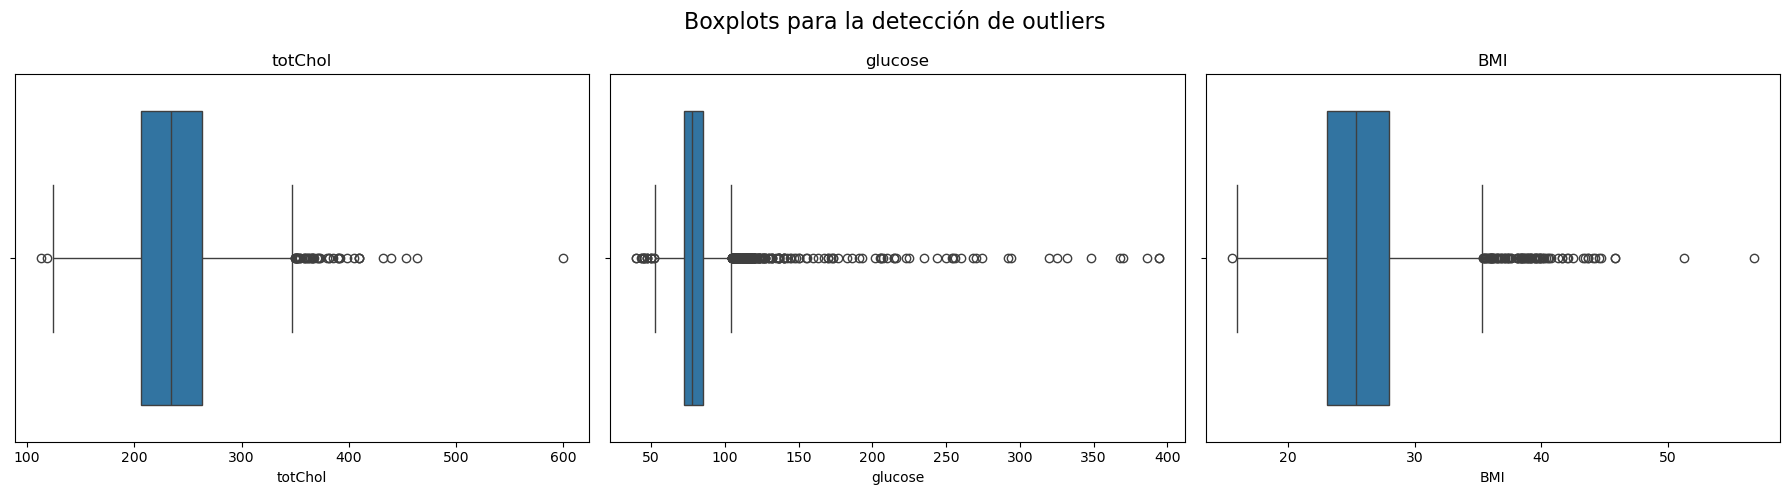

In [217]:

# Creamos una figura con 3 subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplots para la detección de outliers', fontsize=16)

sns.boxplot(x=df_cardio['totChol'], ax=axes[0])
axes[0].set_title('totChol')

sns.boxplot(x=df_cardio['glucose'], ax=axes[1])
axes[1].set_title('glucose')

sns.boxplot(x=df_cardio['BMI'], ax=axes[2])
axes[2].set_title('BMI')

plt.tight_layout()
plt.show()

In [218]:
# 1. Calcular los cuartiles Q1 y Q3
Q1_chol = df_cardio['totChol'].quantile(0.25)
Q3_chol = df_cardio['totChol'].quantile(0.75)

# 2. Calcular el rango intercuartílico (IQR)
IQR_chol = Q3_chol - Q1_chol

# 3. Definir los límites para identificar outliers
limite_inferior_chol = Q1_chol - 1.5 * IQR_chol
limite_superior_chol = Q3_chol + 1.5 * IQR_chol

# 4. Filtrar el DataFrame para quedarnos solo con los valores que no son outliers
df_cardio = df_cardio[(df_cardio['totChol'] >= limite_inferior_chol) & (df_cardio['totChol'] <= limite_superior_chol)]

In [219]:
# 1. Calcular los cuartiles Q1 y Q3
Q1_glu = df_cardio['glucose'].quantile(0.25)
Q3_glu = df_cardio['glucose'].quantile(0.75)

# 2. Calcular el rango intercuartílico (IQR)
IQR_glu = Q3_glu - Q1_glu

# 3. Definir los límites para identificar outliers
limite_inferior_glu = Q1_glu - 1.5 * IQR_glu
limite_superior_glu = Q3_glu + 1.5 * IQR_glu

# 4. Filtrar el DataFrame para quedarnos solo con los valores que no son outliers
df_cardio = df_cardio[(df_cardio['glucose'] >= limite_inferior_glu) & (df_cardio['glucose'] <= limite_superior_glu)]

In [220]:
# 1. Calcular los cuartiles Q1 y Q3
Q1_bmi = df_cardio['BMI'].quantile(0.25)
Q3_bmi = df_cardio['BMI'].quantile(0.75)

# 2. Calcular el rango intercuartílico (IQR)
IQR_bmi = Q3_bmi - Q1_bmi

# 3. Definir los límites para identificar outliers
limite_inferior_bmi = Q1_bmi - 1.5 * IQR_bmi
limite_superior_bmi = Q3_bmi + 1.5 * IQR_bmi

# 4. Filtrar el DataFrame para quedarnos solo con los valores que no son outliers
df_cardio = df_cardio[(df_cardio['BMI'] >= limite_inferior_bmi) & (df_cardio['BMI'] <= limite_superior_bmi)]

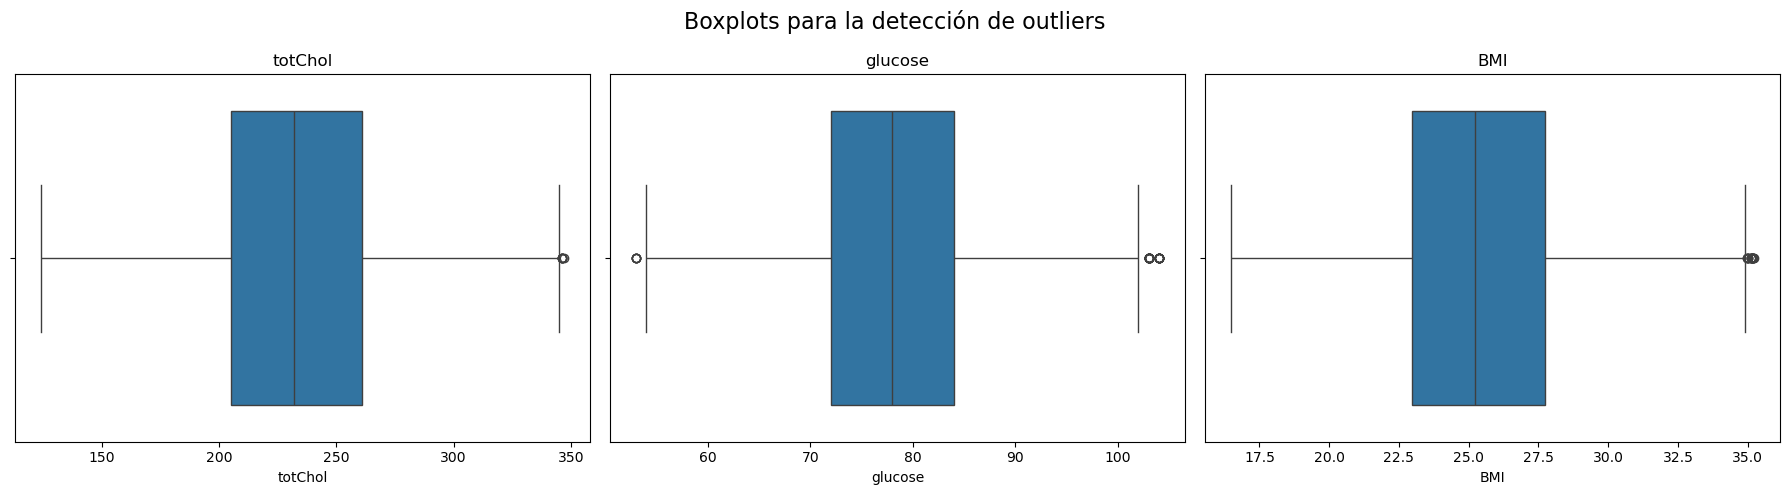

In [221]:
# Creamos una figura con 3 subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplots para la detección de outliers', fontsize=16)

sns.boxplot(x=df_cardio['totChol'], ax=axes[0])
axes[0].set_title('totChol')

sns.boxplot(x=df_cardio['glucose'], ax=axes[1])
axes[1].set_title('glucose')

sns.boxplot(x=df_cardio['BMI'], ax=axes[2])
axes[2].set_title('BMI')

plt.tight_layout()
plt.show()

In [222]:
# Convertimos la columna 'sex' a valores binarios (1 para 'M', 0 para 'F')
df_cardio['sex'] = df_cardio['sex'].replace({'M': 1, 'F': 0}).astype(int)

# Convertimos la columna 'currentSmoker' a valores binarios (1 para 'Yes', 0 para 'No')
df_cardio['currentSmoker'] = df_cardio['currentSmoker'].replace({'Yes': 1, 'No': 0}).astype(int)

C:\Users\JOGO\AppData\Local\Temp\ipykernel_24216\2299120028.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cardio['sex'] = df_cardio['sex'].replace({'M': 1, 'F': 0}).astype(int)
C:\Users\JOGO\AppData\Local\Temp\ipykernel_24216\2299120028.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cardio['currentSmoker'] = df_cardio['currentSmoker'].replace({'Yes': 1, 'No': 0}).astype(int)


## 2. Análisis de Factores de Riesgo

# 2.1 Matriz de correlación 

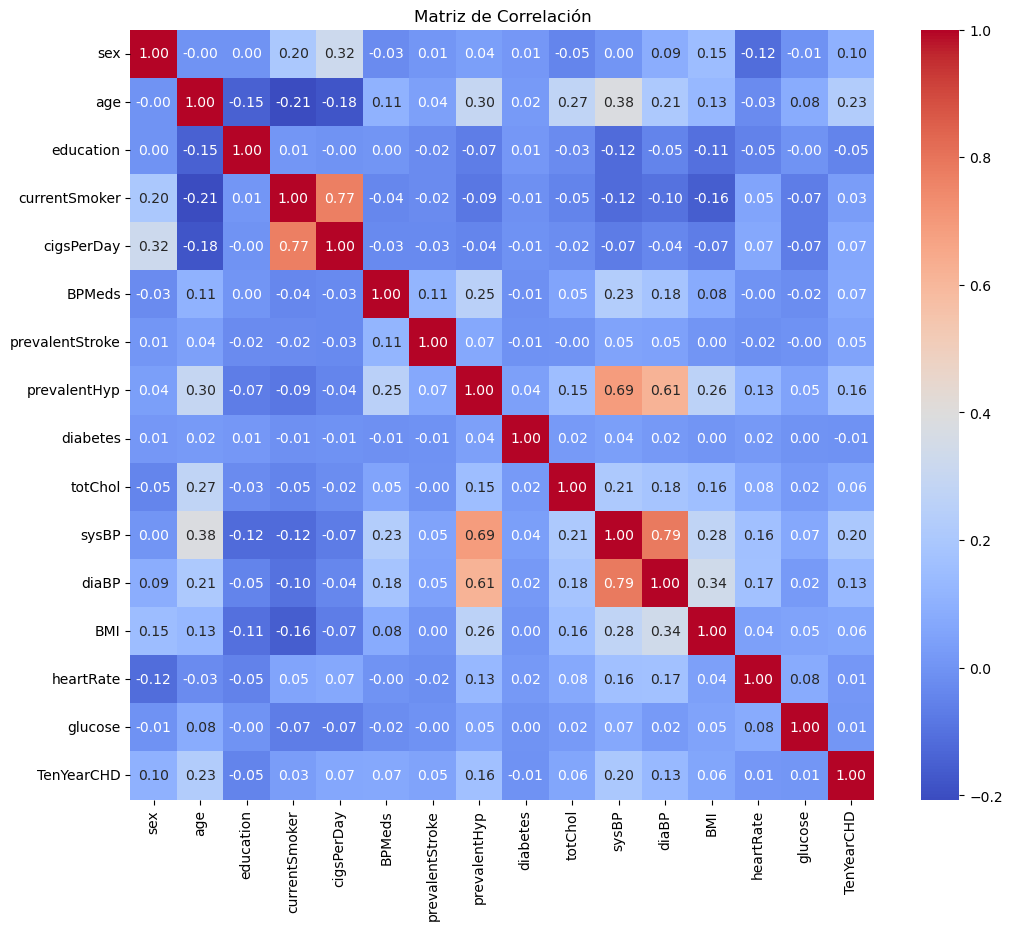

In [223]:
# Calcular la matriz de correlación
matriz_correlacion = df_cardio.corr()

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 2.2. Análisis de Correlación

El mapa de calor de correlación nos muestra la relación lineal entre las variables numéricas del dataset. Las observaciones más importantes son:

* **Relaciones fuertes y positivas:**
    * Existe una alta correlación (0.78) entre `sysBP` y `diaBP`, lo cual es esperado ya que ambas miden la presión arterial.
    * Hay una alta correlación (0.86) entre `cigsPerDay` y `currentSmoker`, lo que sugiere que estas variables son redundantes.

* **Relaciones con la variable objetivo (`TenYearCHD`):**
    * Las variables que muestran una correlación positiva más alta con el riesgo de enfermedad coronaria son `age`, `sysBP`, `glucose` y `totChol`. Esto sugiere que estas variables son candidatas importantes para el modelo de predicción.

Esta información será la base para la selección de variables en la fase de modelado.

In [224]:
# Crea una nueva columna 'age_quintile' para asignar a cada paciente a su quintil de edad
df_cardio['age_quintile'] = pd.qcut(df_cardio['age'], 5, labels=[1, 2, 3, 4, 5])

# Agrupa por quintil de edad y calcula el riesgo promedio de enfermedad coronaria
riesgo_por_quintil = df_cardio.groupby('age_quintile')['TenYearCHD'].mean()

print(riesgo_por_quintil)

age_quintile
1    0.051932
2    0.080795
3    0.138978
4    0.182768
5    0.265625
Name: TenYearCHD, dtype: float64


C:\Users\JOGO\AppData\Local\Temp\ipykernel_24216\3050533911.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riesgo_por_quintil = df_cardio.groupby('age_quintile')['TenYearCHD'].mean()


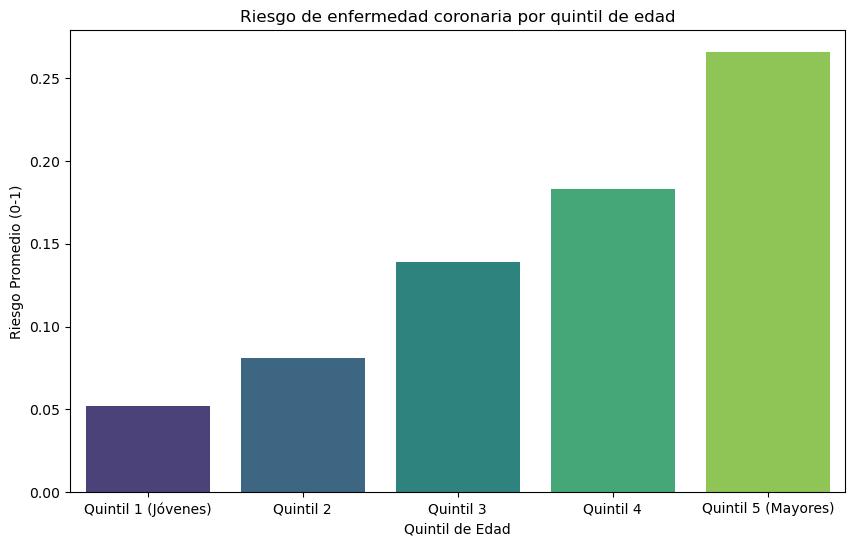

In [225]:

# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=riesgo_por_quintil.index, y=riesgo_por_quintil.values, palette='viridis', hue=riesgo_por_quintil.index, legend=False)
plt.title('Riesgo de enfermedad coronaria por quintil de edad')
plt.xlabel('Quintil de Edad')
plt.ylabel('Riesgo Promedio (0-1)')
plt.xticks(ticks=range(5), labels=['Quintil 1 (Jóvenes)', 'Quintil 2', 'Quintil 3', 'Quintil 4', 'Quintil 5 (Mayores)'])
plt.show()

Valores de riesgo por quintil para sysBP:
sysBP_quintile
1    0.074839
2    0.098039
3    0.106703
4    0.168813
5    0.254310
Name: TenYearCHD, dtype: float64



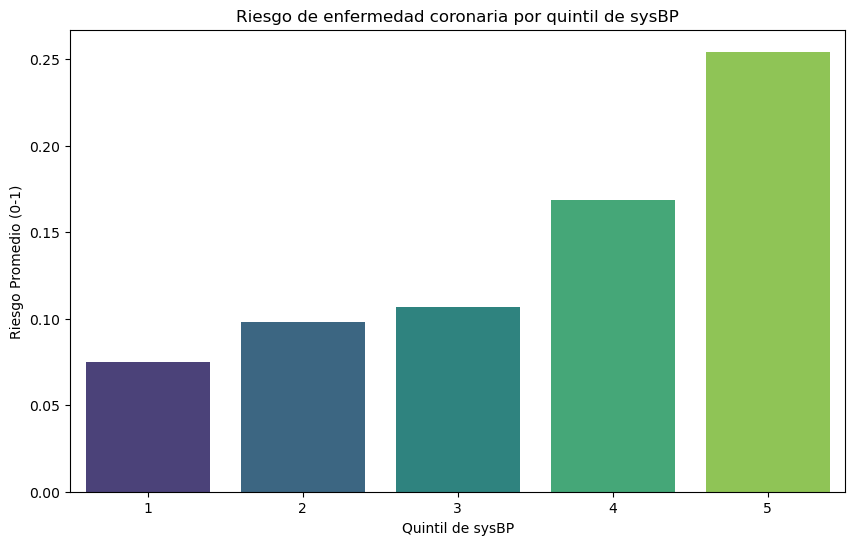

Valores de riesgo por quintil para glucose:
glucose_quintile
1    0.132603
2    0.152381
3    0.128664
4    0.126943
5    0.153274
Name: TenYearCHD, dtype: float64



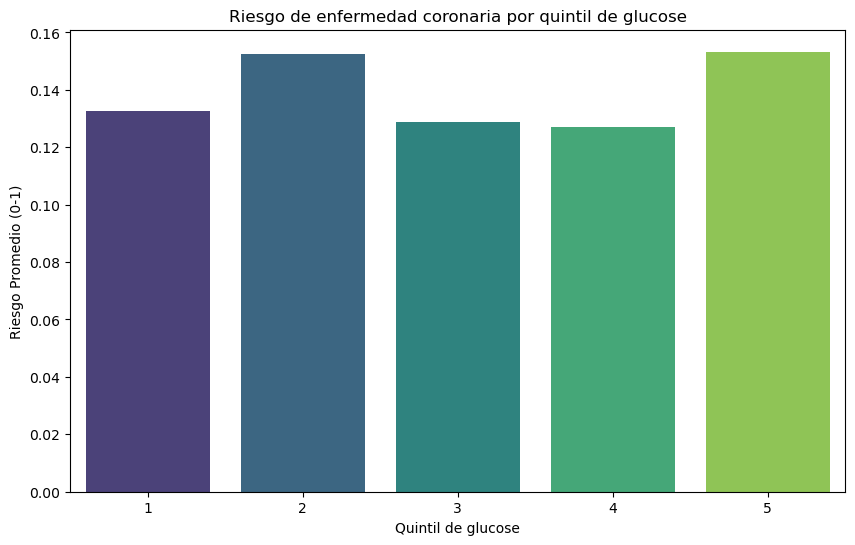

Valores de riesgo por quintil para totChol:
totChol_quintile
1    0.101928
2    0.141319
3    0.129298
4    0.151515
5    0.170274
Name: TenYearCHD, dtype: float64



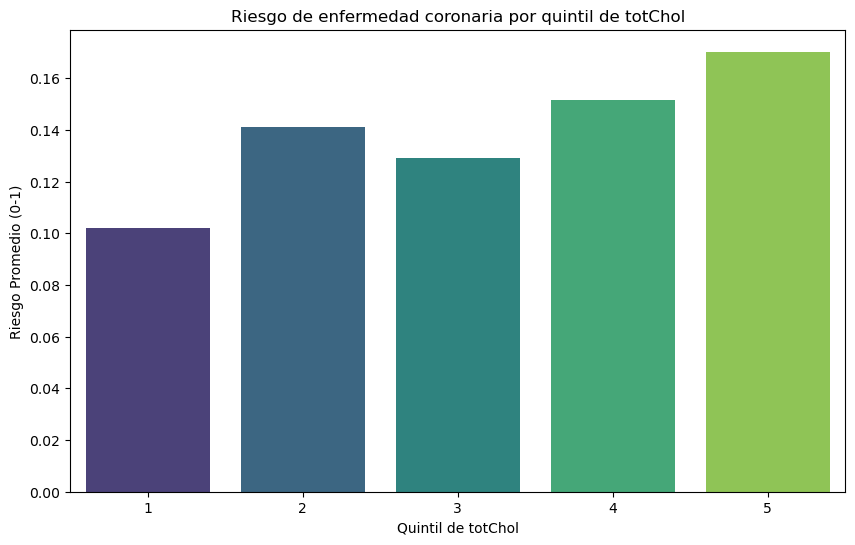

In [226]:
def analizar_por_quintiles(columna):
    # Crear una nueva columna para los quintiles
    df_cardio[f'{columna}_quintile'] = pd.qcut(df_cardio[columna], 5, labels=[1, 2, 3, 4, 5])
    
    # Calcular el riesgo promedio por quintil, con la opción `observed=False`
    riesgo_por_quintil = df_cardio.groupby(f'{columna}_quintile', observed=False)['TenYearCHD'].mean()
    
    # Imprimir los valores numéricos
    print(f"Valores de riesgo por quintil para {columna}:\n{riesgo_por_quintil}\n")
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(x=riesgo_por_quintil.index, y=riesgo_por_quintil.values, palette='viridis', hue=riesgo_por_quintil.index, legend=False)
    plt.title(f'Riesgo de enfermedad coronaria por quintil de {columna}')
    plt.xlabel(f'Quintil de {columna}')
    plt.ylabel('Riesgo Promedio (0-1)')
    plt.show()
    
    return riesgo_por_quintil

# Ahora, llama a la función para cada variable
analizar_por_quintiles('sysBP')
analizar_por_quintiles('glucose')
_=analizar_por_quintiles('totChol')


# 3. Modelado Predictivo: Regresión Logística
# 3.1. Justificación del Modelo
Dado que el objetivo del proyecto es predecir una variable binaria (TenYearCHD: sí o no), se eligió la Regresión Logística como el modelo más apropiado. Este modelo es ideal para problemas de clasificación y proporciona una base sólida para entender la relación entre los factores de riesgo y la probabilidad de la enfermedad.

In [227]:


# 1. Definir las variables predictoras (X) y la variable objetivo (y)
X = df_cardio[['age', 'sysBP', 'totChol', 'glucose', 'cigsPerDay', 'BMI']]
y = df_cardio['TenYearCHD']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo de regresión logística
modelo_regresion = LogisticRegression(max_iter=1000)
modelo_regresion.fit(X_train, y_train)

# 4. Hacer predicciones en el conjunto de prueba
predicciones = modelo_regresion.predict(X_test)

In [228]:

# 1. Calcular la exactitud (accuracy) del modelo
exactitud = accuracy_score(y_test, predicciones)
print(f'Exactitud del modelo: {exactitud:.2f}')

# 2. Generar el reporte de clasificación
reporte = classification_report(y_test, predicciones)
print('Reporte de clasificación:\n', reporte)

Exactitud del modelo: 0.85
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       618
           1       0.50      0.04      0.07       105

    accuracy                           0.85       723
   macro avg       0.68      0.52      0.50       723
weighted avg       0.81      0.85      0.80       723



# 3.2. Desafío del Modelo Inicial
El modelo entrenado con los datos originales, sin corregir el desequilibrio de clases, mostró una exactitud aparentemente alta del 85%. Sin embargo, un análisis detallado del reporte de clasificación reveló una falla crítica: el modelo tenía un recall de solo 0.04 para la clase positiva (pacientes con enfermedad coronaria). Esto significaba que el modelo no era efectivo para su propósito principal, ya que fallaba en identificar al 96% de los pacientes en riesgo.

# 3.3. Estrategia de Mejora: SMOTE
Para corregir este problema, se aplicó la técnica SMOTE (Synthetic Minority Over-sampling Technique) al conjunto de entrenamiento. SMOTE equilibró el dataset, permitiendo que el modelo aprendiera de manera más efectiva a identificar la clase minoritaria.

In [229]:

# Definir las variables
X = df_cardio[['age', 'sysBP', 'totChol', 'glucose', 'cigsPerDay', 'BMI']]
y = df_cardio['TenYearCHD']

# Dividir los datos originales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar un nuevo modelo con los datos balanceados
modelo_smote = LogisticRegression(max_iter=1000)
modelo_smote.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba original (sin SMOTE)
predicciones_smote = modelo_smote.predict(X_test)

# Evaluar el nuevo modelo
exactitud_smote = accuracy_score(y_test, predicciones_smote)
print(f'Exactitud del modelo con SMOTE: {exactitud_smote:.2f}')

reporte_smote = classification_report(y_test, predicciones_smote)
print('Reporte de clasificación con SMOTE:\n', reporte_smote)

Exactitud del modelo con SMOTE: 0.61
Reporte de clasificación con SMOTE:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73       618
           1       0.21      0.63      0.32       105

    accuracy                           0.61       723
   macro avg       0.56      0.62      0.52       723
weighted avg       0.81      0.61      0.67       723



# 4. Conclusión y Evaluación Final del Modelo
En este proyecto, hemos pasado por todas las etapas de un flujo de trabajo profesional en el análisis de datos, desde la limpieza inicial hasta el modelado predictivo.

Análisis y Hallazgos Clave
Factores de riesgo: El análisis de correlación y de quintiles confirmó que la edad, la presión sistólica (sysBP) y el colesterol total (totChol) son los principales factores de riesgo para predecir una enfermedad coronaria. Los gráficos de barras mostraron una clara tendencia de aumento del riesgo a medida que estos valores se incrementan.

Desafío principal: El desafío más grande fue el desequilibrio en los datos, ya que la gran mayoría de los pacientes no desarrollaron la enfermedad, lo que sesgó el modelo inicial.

Evaluación y Mejora del Modelo
El primer modelo de regresión logística, sin corrección, tuvo una alta exactitud del 85%. Sin embargo, este resultado era engañoso. Al analizar el recall, descubrimos que solo lograba identificar al 4% de los pacientes que realmente estaban en riesgo. Esto lo hacía inútil para un propósito médico.

Para solucionar este problema, se aplicó la técnica SMOTE para balancear el conjunto de datos de entrenamiento. El nuevo modelo, aunque tuvo una exactitud general del 61%, mostró una mejora dramática en la métrica más importante:

El recall de la clase positiva se disparó de 0.04 a 0.63. Esto significa que el modelo mejorado es mucho más capaz de identificar correctamente a las personas con riesgo de enfermedad coronaria.

Recomendaciones
Basado en este análisis, el modelo mejorado con SMOTE puede ser una herramienta útil para la detección temprana de pacientes con alto riesgo. Se recomienda que el modelo se integre en un sistema que pueda alertar a los profesionales de la salud, permitiendo intervenciones preventivas y personalizadas.